## 1.1 Statement of the Problem



Since the rings in Abalone function similarly to the rings in a tree trunk, we can use the rings to find the age. However, since these shells can be small and the rings sometimes hard to count, we may be able to rely on other measurements to figure out the approximate age. 

The data provided has several variables, and most can be roughly divided into two categories: dimensions and weights. The other two, sex and rings, are categorical and self explanatory. Intuition tells us that abalone where sex=infant will have less rings. It may also be expected that male abalone are bigger than female, but we do not know for sure. Additionally, we expect the weights to be somewhat correlated with each other, since a heavier whole shell will have a bigger meat and a bigger dried shell. Similarly, the dimensions may also be correlated, with longer shells having a larger diameter and height.

For our EDA and models, we will begin with single, as well as pairwise analyses of the variables and the "rings" count. Since most of the categories are not categorical, we can find the correlation coefficients between the two features. For the sex variable, we can create a conditional probabilities table to test how the sex label affects the number of rings. 

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

## 1.2 (ETL) Extract, Transform, Load the Data

In [1]:
# You can load the dataset directly from a URL in Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm
df = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


We have successfully loaded the file but it does not contain a header. We will add one based on the description given above.

In [2]:
df.columns = ['sex', 'length', 'diameter', 'height', 'whole', 'shucked', 'viscera', 'shell', 'rings']
df.head()

,sex,length,diameter,height,whole,shucked,viscera,shell,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


The data looks ready to be explored. However, because this is an interative process and we cannot see into the future, we may need to return to do further cleaning if any problems arise down the road.

## 1.3 (EDA) Exploratory Data Analysis

##### Overall Variable Analysis

We will analyze the variables as a whole to ensure we do not have any missing data and that the each variable type is what was expected.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       4177 non-null   object 
 1   length    4177 non-null   int64  
 2   diameter  4177 non-null   int64  
 3   height    4177 non-null   int64  
 4   whole     4177 non-null   float64
 5   shucked   4177 non-null   float64
 6   viscera   4177 non-null   float64
 7   shell     4177 non-null   float64
 8   rings     4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


There are 4177 non-null entries for each variable, so we do not have any missing data points. All but 3 of the variables are the expected data type. Length, Diameter, and Height are listed in the description as being floats, while in the dataframe they are integers. We will convert them to floats to match the description.

In [4]:
df['length'] = df['length'].astype('float64')
df['diameter'] = df['diameter'].astype('float64')
df['height'] = df['height'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       4177 non-null   object 
 1   length    4177 non-null   float64
 2   diameter  4177 non-null   float64
 3   height    4177 non-null   float64
 4   whole     4177 non-null   float64
 5   shucked   4177 non-null   float64
 6   viscera   4177 non-null   float64
 7   shell     4177 non-null   float64
 8   rings     4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


We may now move forward with individual variable analysis.

### Individual Variable Analysis

#### Sex

To begin the analysis, we will start with the sex variable. We expect three unique entries: male, female, and infant. Infant is a curious option, but may be explained by the Abalone being sexless until a certain age, or it could be hard for scientists to discern a sex until Abalonian puberty.

In [5]:
df.sex.unique()

array(['M', 'F', 'I'], dtype=object)

As expected, there are only 3 possible entries for sex. Let's dig a little deeper.

In [6]:
df.sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: sex, dtype: object

We can observe that out of the 4177 entries, 1528 are male which is the predominant category. We will now find out about the other two sexes. We can expect the female count to be similar to the male count, and what is left over may belong to infant. 

In [7]:
df.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

The other two sexes are split close to evenly, with a female count of 1307 and an infant count of 1342. This is contrary to our prediction, and may be explained by the sexlessness of the infants, which increases its counts. We can better illustrate this with a bar graph, to get a real sense of the differences among them.

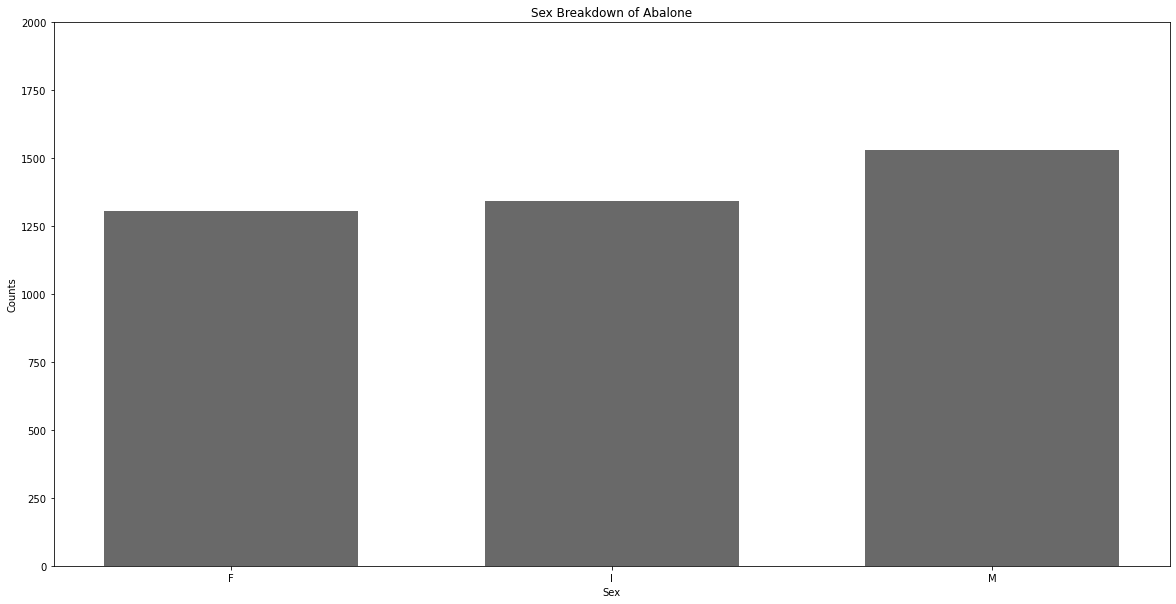

In [8]:
sexcounts = df.sex.value_counts().sort_index() 
x = range(len(sexcounts))
width = 1/1.5
figure = plt.figure(figsize=(20, 10))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, sexcounts, width, color="dimgray", align="center") 
axes.set_xticks(x)
axes.set_xticklabels(sexcounts.axes[0])
axes.set_title( "Sex Breakdown of Abalone") 
axes.set_xlabel("Sex")
axes.set_ylabel( "Counts")
axes.set_ylim(0, 2000)
axes.xaxis.grid(False)
plt.show() 
plt.close()

As the graph illustrates, the I and F sexes are negligibly different, while the male is narrowly ahead. Finally, we will look at percents to finish our analysis of the sex variables.

In [9]:
df.sex.value_counts(normalize=True)

M    0.365813
I    0.321283
F    0.312904
Name: sex, dtype: float64

In summary, we see a fairly uniform distribution of the sexes of the Abalone, each making up about a third of the counts. The male is narrowly ahead with 36% of the counts, while the infant is at 32% and the female is at 31%. 

#### Length

Since sex was the only categorical variable in our analysis, our strategy will change for the rest of the variables. We will rely on distributions and parametric/non-parametric measures to do our analysis. 

In [10]:
df.length.describe()

count    4177.000000
mean      104.798420
std        24.018583
min        15.000000
25%        90.000000
50%       109.000000
75%       123.000000
max       163.000000
Name: length, dtype: float64

We have a mean length of 105mm and a standard deviation of 24. The smallest shell has a length of 15mm and the biggest 163mm. We observe an IQR range of 33 (123-90), which informs us that a majority of shells are between 90mm and 123mm. We will use a histogram to visualize the distribution.

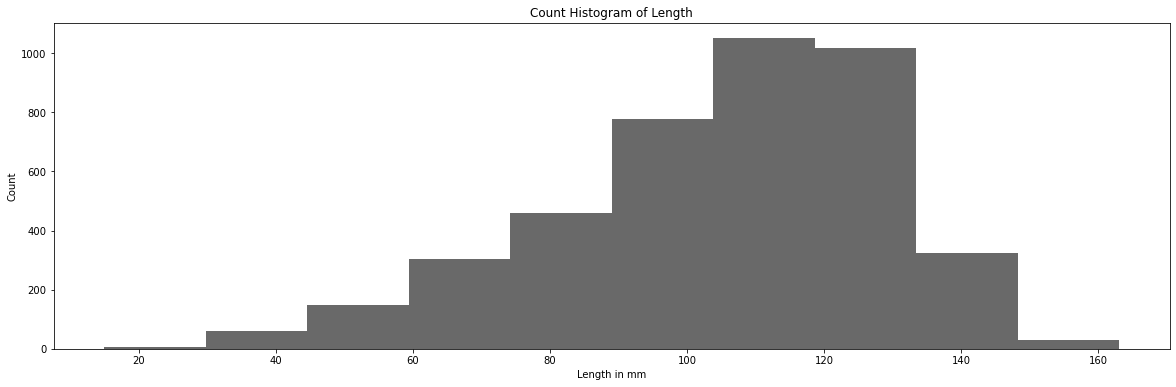

In [11]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df[ "length"], color="DimGray", bins = 10)
axes.set_xlabel( "Length in mm")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Length")
plt.show() 
plt.close()

We observe a left skewed distribtion. Let's look at the distribution with a boxplot instead.

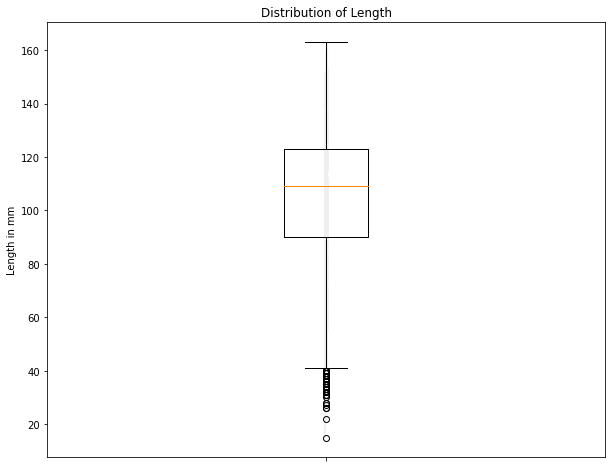

In [12]:
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "length"], labels=[''], showfliers=True, patch_artist=False)
axes.set_title("Distribution of Length")
axes.set_ylabel("Length in mm")
x = np.random.normal(1, 0.001, size=len(df["length"]))
axes.plot(x, df["length"], alpha=0.1, color="DimGray", zorder=1)
plt.show() 
plt.close()

We observe a faily normal distribution, so we do not need to do any kind of transformations. We observe some outliers on the lower end, and the leftward skew observed in the histogram is verified by the boxplot. This trend could be a result of the high number of infants(both/neither male or female) in relation to the other two sexes.

#### Diameter

Similar to length, diameter is also expected to have a normal distribution, again with a left skew caused by the infants. This similarity is caused by the direct relationship between length and diameter (assuming the diameter is measured lengthwise). 

In [13]:
df.diameter.describe()

count    4177.000000
mean       81.576251
std        19.847973
min        11.000000
25%        70.000000
50%        85.000000
75%        96.000000
max       130.000000
Name: diameter, dtype: float64

We observe a mean diameter of around 81 and a standard deviation of around 20. The min and max differ slightly from the length, which tells us that the diameter is not measured lengthwise. The smallest diameter is 11mm and the biggest is 130mm. The IQR is 26, with a majority of the values falling between 70 and 96. We will now use a histogram to represent this visually. Again there is a bigger difference between the min and first quartile than the max and 3rd quartile, so we expect another left skew.

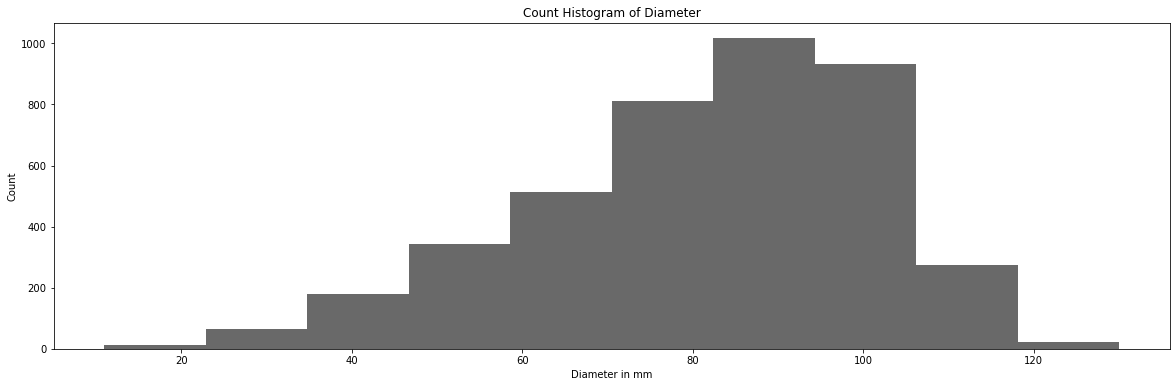

In [14]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df[ "diameter"], color="DimGray", bins = 10)
axes.set_xlabel( "Diameter in mm")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Diameter")
plt.show() 
plt.close()

We observe an almost identical histogram to the length. Our prediction of the left skew is validated. We will now use a boxplot to further analyze the distribution. 

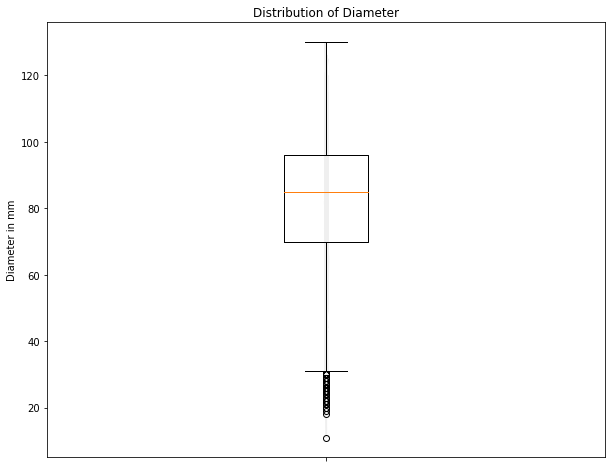

In [15]:
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "diameter"], labels=[''], showfliers=True, patch_artist=False)
axes.set_title("Distribution of Diameter")
axes.set_ylabel("Diameter in mm")
x = np.random.normal(1, 0.001, size=len(df["diameter"]))
axes.plot(x, df["diameter"], alpha=0.1, color="DimGray", zorder=1)
plt.show() 
plt.close()

Again we observe a few outliers toward the lower end of the distribution, with the overall shape mirroring the length boxplot. We can say with confidence that there is increased variability within the infant population when it comes to size than in the male/female, but we will use the height variable to verify.

#### Height

We expect height to also have a normal distribution, again with a left caused by the infant population. We will first look at the numeric distribution.

In [16]:
df.height.describe()

count    4177.000000
mean       27.903280
std         8.365411
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max       226.000000
Name: height, dtype: float64

We observe a mean of close to 28mm and a standard deviation of around 8mm for the height of the abalone. We also have a very narrow IQR of 10, between 23 and 33. Surprisingly, we have a minimum height of 0 and a maximum of 226. We will investigate these values further before proceeding. 

In [17]:
print(df.sort_values(by = 'height'))

     sex  length  diameter  height  whole  shucked  viscera  shell  rings
3996   I    63.0      46.0     0.0   26.8     11.5      5.7   70.1      6
1257   I    86.0      68.0     0.0   85.6     41.3     17.2   23.0      8
236    I    15.0      11.0     2.0    0.4      0.2      0.1    0.3      1
2169   I    33.0      23.0     3.0    2.9      1.1      0.6    1.0      4
1174   F   127.0      99.0     3.0  231.3    102.3     61.6   57.7      9
...   ..     ...       ...     ...    ...      ...      ...    ...    ...
1763   M   155.0     126.0    50.0  555.9    269.7    152.0  115.6     12
1428   F   163.0     130.0    50.0  451.0    178.1     84.0  159.5     14
2179   F   119.0      94.0    50.0  256.6     92.4     49.5   89.0     14
1417   M   141.0     113.0   103.0  442.0    221.5     97.3  102.4     10
2051   F    91.0      71.0   226.0  118.8     66.4     23.2   26.7      8

[4177 rows x 9 columns]


We sorted the values by height to observe the extremes. It seems that we actually have two cases where the height is 0 while the other values are nonzero. We could hypothesize that the abalone were too thin to be measured and their height was less than 1mm. However looking at their other dimensions, that is not a resonable assumption. The weights of the next highest(2.0) abalone are under a value of 1, while the weights of the abalones with heights of 0 are all above 5. We thus assume that this data is missing. 

Similarly, we observe two max outliers for height with 103mm and 226mm. Again comparing to the next smaller heights, we see the unreasonableness of these values. The three next lower heights are all 50, which seems to be the reasonable maximum. The other dimensions and weights for these two outliers are also not proportionally big, which again would indicate an error in these two cases. Any kind of analysis with these values will be skewed, so we will remove them. 

In [18]:
dffix = df.drop(df[(df['height'] < 2.0) | (df['height'] > 50)].index)
print(dffix.sort_values(by = 'height'))

     sex  length  diameter  height  whole  shucked  viscera  shell  rings
236    I    15.0      11.0     2.0    0.4      0.2      0.1    0.3      1
1174   F   127.0      99.0     3.0  231.3    102.3     61.6   57.7      9
2169   I    33.0      23.0     3.0    2.9      1.1      0.6    1.0      4
694    I    33.0      22.0     4.0    3.8      1.3      0.5    1.0      4
3902   I    32.0      24.0     4.0    3.6      1.5      0.9    1.0      4
...   ..     ...       ...     ...    ...      ...      ...    ...    ...
1528   M   145.0     115.0    48.0  442.0    270.2     82.6  100.3     13
307    M   129.0     103.0    48.0  308.3     94.2     73.8  107.0     13
2179   F   119.0      94.0    50.0  256.6     92.4     49.5   89.0     14
1428   F   163.0     130.0    50.0  451.0    178.1     84.0  159.5     14
1763   M   155.0     126.0    50.0  555.9    269.7    152.0  115.6     12

[4173 rows x 9 columns]


We have removed the 4 cases. Now we can restart the EDA on the height. 

In [19]:
dffix.height.describe()

count    4173.000000
mean       27.851186
std         7.675505
min         2.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        50.000000
Name: height, dtype: float64

We notice that our mean, standard deviation, and quartiles did not change much. The max and min did change however, which will allow us to create more accurate histograms and boxplots. We will begin with a histogram to visualize the distribution.

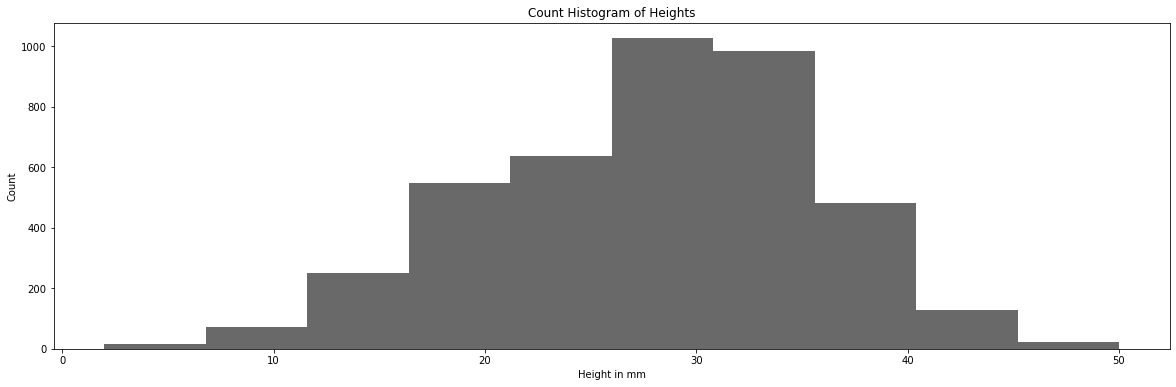

In [20]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(dffix[ "height"], color="DimGray", bins = 10)
axes.set_xlabel( "Height in mm")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Heights")
plt.show() 
plt.close()

Similar to diameter and length, we observe a left skewed distribution as evidenced in the describe() counts and the histogram. It is fairly similar to the other dimensional distributions, with a slighly longer right tail. We will now represent the data with a boxplot. We expect a barely visible skew with very few outliers.

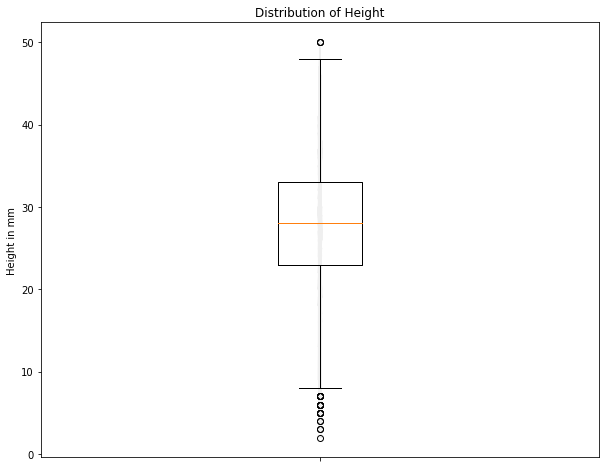

In [21]:
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(dffix[ "height"], labels=[''], showfliers=True, patch_artist=False)
axes.set_title("Distribution of Height")
axes.set_ylabel("Height in mm")
x = np.random.normal(1, 0.001, size=len(dffix["diameter"]))
axes.plot(x, dffix["height"], alpha=0.1, color="DimGray", zorder=1)
plt.show() 
plt.close()

We observe a few outliers on the lower end and one on the high end. Otherwise, this is a very normal distribution.

#### Whole Weight

The whole weight categroy is expected to have the highest numbers out of all the weights. A normal distribution is also expected from this category. We will begin with simple descriptives. Also, we will be using the original data, not the data with the four removed height entries.

In [22]:
df.whole.describe()

count    4177.000000
mean      165.748432
std        98.077804
min         0.400000
25%        88.300000
50%       159.900000
75%       230.600000
max       565.100000
Name: whole, dtype: float64

We observe an average weight of around 166 grams with a fairly big standard deviation of 98. From this we can imagine a broad distribution. The IQR is around 140, with most weights between 88 and 230 grams. The min is 0.4 g, which seems reasonable compared to the 0 height, and the max is 565.1 g, which is also not unreasonable, but quite an outlier. We will represent this visually with a histogram.

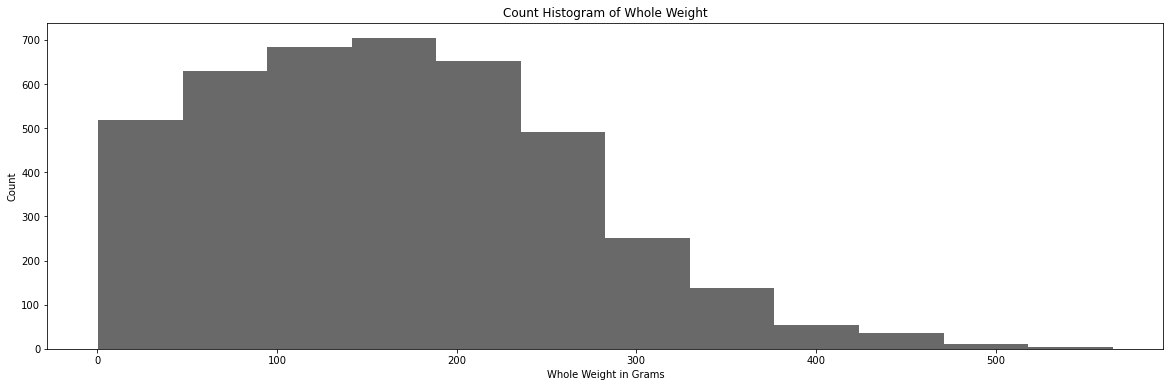

In [23]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(dffix[ "whole"], color="DimGray", bins = 12)
axes.set_xlabel( "Whole Weight in Grams")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Whole Weight")
plt.show() 
plt.close()

Confirmed by the descriptives, we observe a right skew this time, in contrast to all the other dimensions. We also see a fairly broad distribution (i.e. high variance). Next, we will use a boxplot to represent the data. We expect to see a few outliers on the high end of the values.

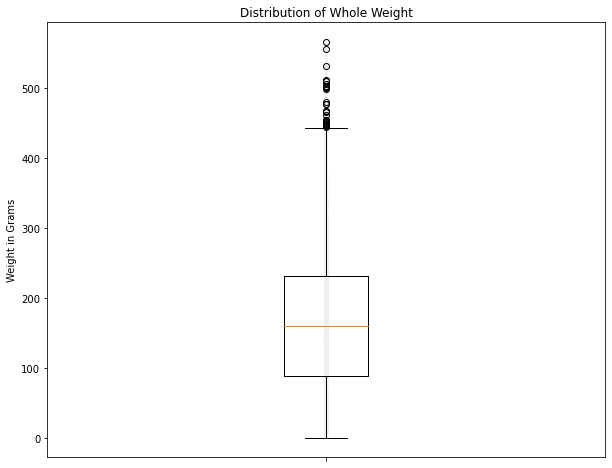

In [24]:
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "whole"], labels=[''], showfliers=True, patch_artist=False)
axes.set_title("Distribution of Whole Weight")
axes.set_ylabel("Weight in Grams")
x = np.random.normal(1, 0.001, size=len(df["whole"]))
axes.plot(x, df["whole"], alpha=0.1, color="DimGray", zorder=1)
plt.show() 
plt.close()

As expected, we have several outliers in the 500s. However since there are so many values that are close to those numbers, we can be sure that thos are not mistakes in the data. 

#### Shucked Weight

Shucked weight (the weight of the meat inside the abalone) should have a similar distribution to the whole weight. Since the meat is only a fraction of the entire weight, we expect the mean and standard deviation to be much smaller, as well as the min and max.

In [25]:
df.shucked.describe()

count    4177.000000
mean       71.873498
std        44.392590
min         0.200000
25%        37.200000
50%        67.200000
75%       100.400000
max       297.600000
Name: shucked, dtype: float64

We observe values that are roughly half of the whole weight values above. The smallest abalone meat weighs just 0.2 grams, while the biggest is close to 300! The mean is about 72 grams, and most weights fall between 37 and 100 grams. Since the mean is greater than the median, we have a right skewed dataset, which we expect to see in the histogram.

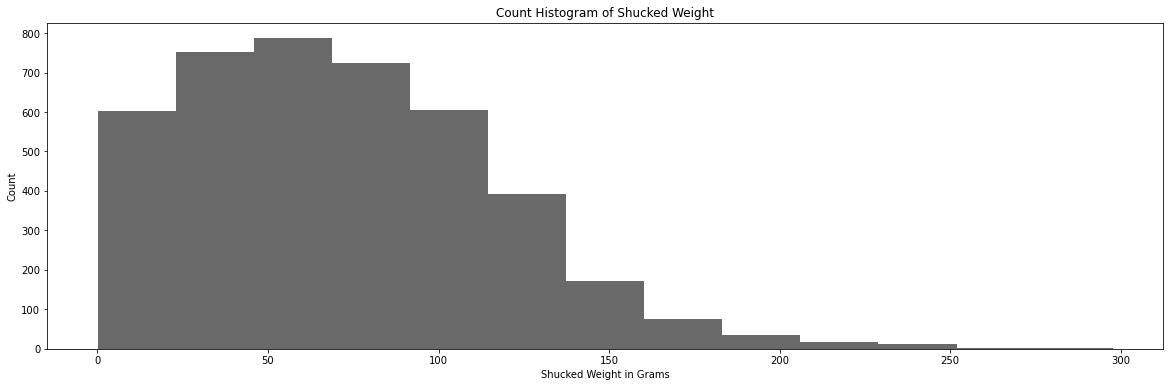

In [26]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df[ "shucked"], color="DimGray", bins = 13)
axes.set_xlabel( "Shucked Weight in Grams")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Shucked Weight")
plt.show() 
plt.close()

This histogram of shucked weight is very similar to the whole weight. The right skew is visually confirmed, and we see the long right tail of the distribution. For the boxplot, we expect again some outliers on the high end of the dataset represented by the low bin height in that area.

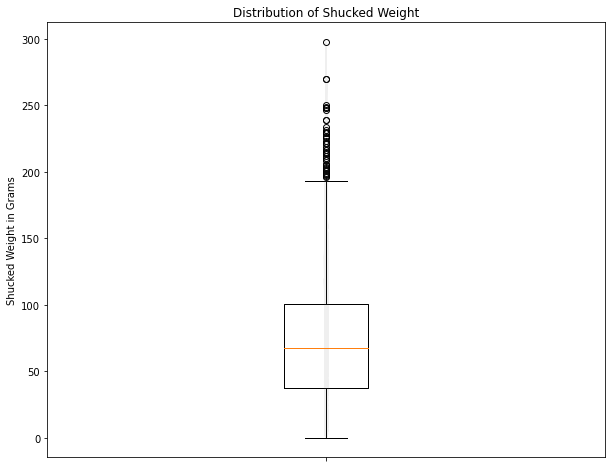

In [27]:
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "shucked"], labels=[''], showfliers=True, patch_artist=False)
axes.set_title("Distribution of Shucked Weight")
axes.set_ylabel("Shucked Weight in Grams")
x = np.random.normal(1, 0.001, size=len(df["shucked"]))
axes.plot(x, df["shucked"], alpha=0.1, color="DimGray")
plt.show() 
plt.close()

We notice increased variability on the higher end of the distribution. We also see the predicted outliers at the very top. From the boxplot, most values fall between 0 and 200. The highest shucked weight is smaller than the highest whole weight, so we know there aren't any weighing errors between these categories.

#### Viscera Weight

Viscera weight refers to the weight of the guts after bleeding. It should be the smallest weight out of the four. Like the rest of the weights, we expect a slight right skew.

In [28]:
df.viscera.describe()

count    4177.000000
mean       36.118722
std        21.922850
min         0.100000
25%        18.700000
50%        34.200000
75%        50.600000
max       152.000000
Name: viscera, dtype: float64

With a mean of 36 and a standard deviation of 22, this is the smallest overall weight category. The smallest abalone gut weighs just 0.1 grams while the biggest is 152 grams. We see an IQR of about 32, with most shell guts falling between 18.7 grams and 50.6 grams. Because the mean is higher than the median, we indeed have another right skew. We will visualize this with a histogram.

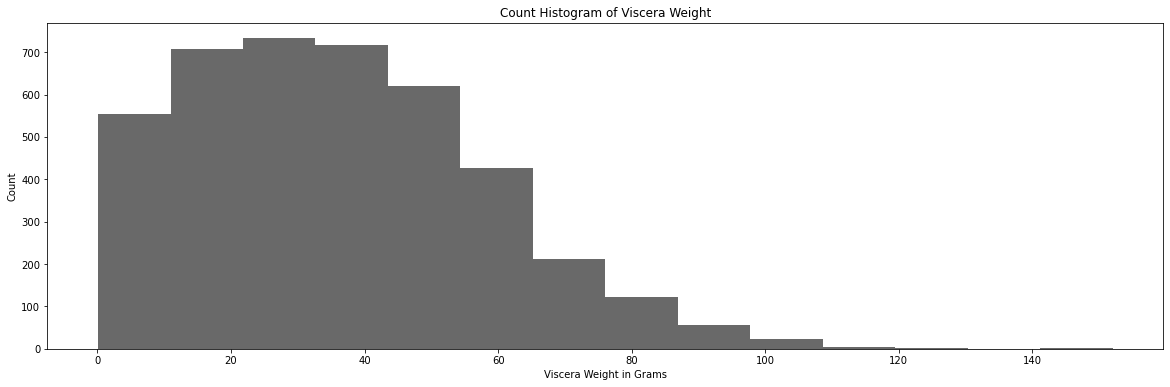

In [29]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df[ "viscera"], color="DimGray", bins = 14)
axes.set_xlabel( "Viscera Weight in Grams")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Viscera Weight")
plt.show() 
plt.close()

As expected, we see a right skew with a long right tail for this distribution. We have a very few values above 100 grams that will be visualized clearly in the box plot. 

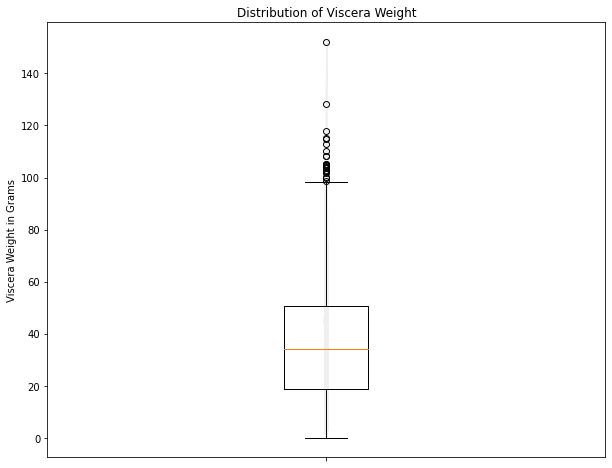

In [30]:
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "viscera"], labels=[''], showfliers=True, patch_artist=False)
axes.set_title("Distribution of Viscera Weight")
axes.set_ylabel("Viscera Weight in Grams")
x = np.random.normal(1, 0.001, size=len(df["viscera"]))
axes.plot(x, df["viscera"], alpha=0.1, color="DimGray")
plt.show() 
plt.close()

As predicted, the outliers above the 100 gram mark are clearly illustrated, as are those above the 120 gram mark. The box plot confirms the increased variation in the higher end of the values.

#### Shell Weight

Last of the weight categories, we have shell weight. This is the weight of the shell once it has dried and is without any meat or guts. We do not expect this to be the smallest, as the shell is a solid structure and makes up a good amount of the overall weight. This is also where the rings are located, so we expect that it is a fairly good predictor of age, but we are not there yet. We will begin with descriptives first. 

In [31]:
df.shell.describe()

count    4177.000000
mean       47.766172
std        27.840534
min         0.300000
25%        26.000000
50%        46.800000
75%        65.800000
max       201.000000
Name: shell, dtype: float64

We see the mean weight of the shell is around 48, with a standard deviation of 28. The smallest shell weight we have is 0.3 grams while the biggest is over 200 grams! We have and IQR of close to 40, with most shell weights falling between 26 and 66. Again, the mean is greater than the median, so we expect a right skew, which we will visually confirm with a histogram.

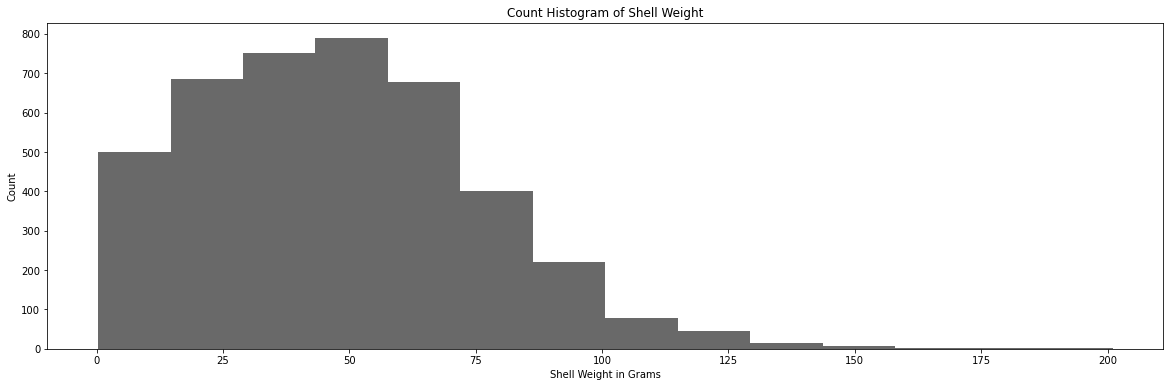

In [32]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df[ "shell"], color="DimGray", bins = 14)
axes.set_xlabel( "Shell Weight in Grams")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Shell Weight")
plt.show() 
plt.close()

The long right tail indicates a right skew as expected. We observe a faily normal distribution around the mean, with a few outliers above 150g. We will use a box plot to visualize these values and the whole distribution. 

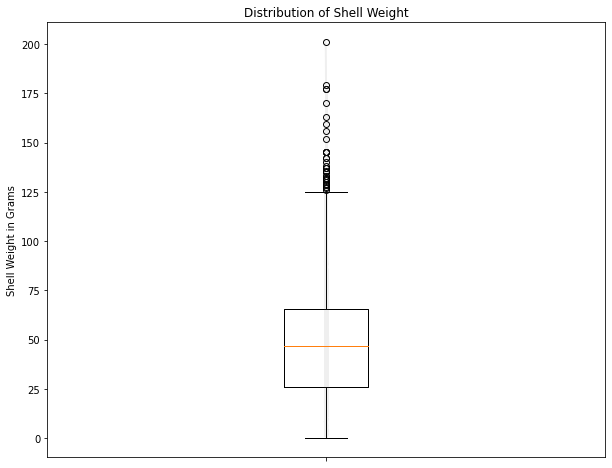

In [33]:
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "shell"], labels=[''], showfliers=True, patch_artist=False)
axes.set_title("Distribution of Shell Weight")
axes.set_ylabel("Shell Weight in Grams")
x = np.random.normal(1, 0.001, size=len(df["shell"]))
axes.plot(x, df["shell"], alpha=0.1, color="DimGray")
plt.show() 
plt.close()

We observe several outliers above 125, with highest around 200. Shell weight seems to have the highest number of outliers out of all the weights. The skewness of the data is also revealed in the box plot. 

#### Rings

Finally, we will anaylize the rings. Looking at our head() command earlier, we expect most values of rings to fall between 0 and 20. We should also recall that to find the age of a shell, we add 1.5 to the age. We will being with simple descriptives.

In [34]:
df.rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: rings, dtype: float64

We observe a mean of around 10 with a standard deviation of around 3.2. The youngest abalone has just 1 ring, while the oldest has 29, contrary to our prediction. We observe that most abalones in this sample however have between 8 to 11 rings. We have the right amount of categories that we can figure out how many of each number of rings there are. We expect a fairly normal distribution, with the highest number between 8 and 11 rings. However, we should note the mean is slightly higher than the median, which indicates a right skew. 

In [35]:
df.rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: rings, dtype: int64

As expected, the four highest ring counts are 9, 10, 8, and 11 respectively. The least ring counts are 29, 26, 2, and 25. Since these are on the extremes, we expect our histogram to follow a fairly normal curve.

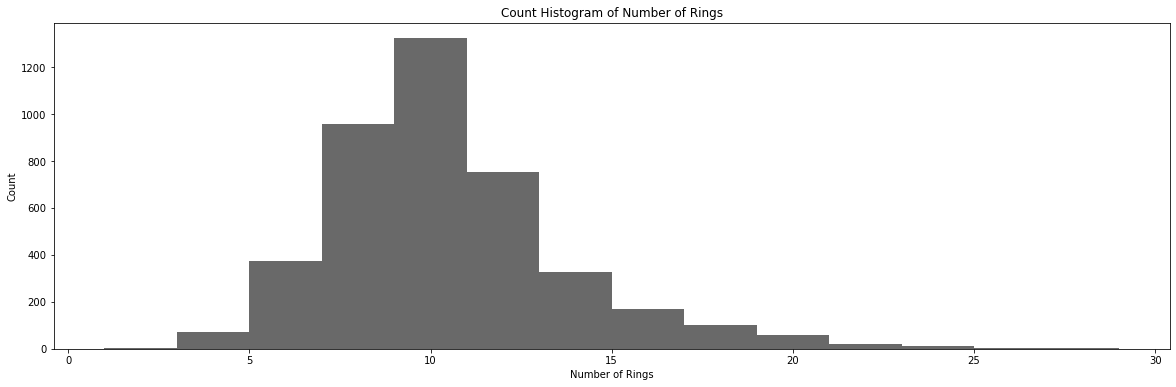

In [36]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df[ "rings"], color="DimGray", bins = 14)
axes.set_xlabel( "Number of Rings")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Number of Rings")
plt.show() 
plt.close()

As expected, we have a normally distributed curve with a long right tail. It seems that few abalone live long enough to have more than 15 rings, but there are some that do. We will use a box plot now to see how many of the elderly abalone are outliers.

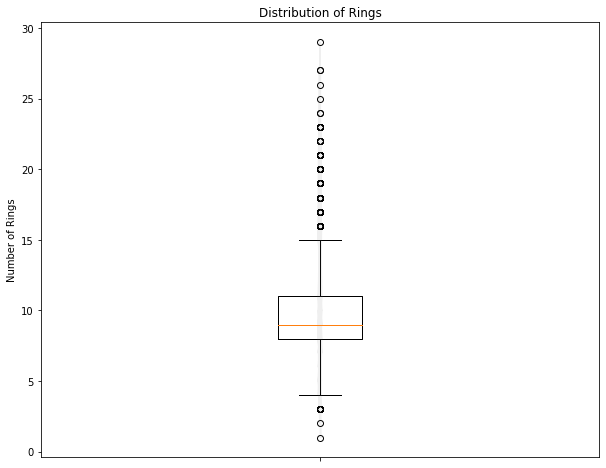

In [37]:
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "rings"], labels=[''], showfliers=True, patch_artist=False)
axes.set_title("Distribution of Rings")
axes.set_ylabel("Number of Rings")
x = np.random.normal(1, 0.001, size=len(df["rings"]))
axes.plot(x, df["rings"], alpha=0.1, color="DimGray")
plt.show() 
plt.close()

Surprisingly, we have several outliers above 15, but also below 4. The right skew is also revealed in the box plot. In summary, most abalone have between 0 and 30 rings, non-inclusive, making the oldest one found 30.5 years old!

### Pairwise EDA

We will now begin our pairwise EDA. Before we begin, we must understand that there are too many variables to do all the pairs possible, so we must use domain knowledge and common sense to find the interesting relationships. Additionally, all of the weights are more than likely to be correlated to one another, so intra-weight relationships will not be explored. When comparing pairwise, we will use the whole weight as a representation of all the other weights. 

One of the few relationships that has been most interesting during the Single Variable EDA was the infant category and the number of rings, so this is where we will begin.

#### Sex and Rings

The infant description is under the sex category, along with male or female. It suggests that "infant" abalone are young shells who have not/do not have a specific sex yet. Our first task is to figure out what the cutoff is to be considered an infant abalone. 

In [38]:
#from Fundamentals, page 226
def describe_by_category(data, numeric, categorical): 
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe() 
    print(grouped_y)

In [39]:
describe_by_category(df, 'rings', 'sex')

      count       mean       std  min  25%   50%   75%   max
sex                                                         
F    1307.0  11.129304  3.104256  5.0  9.0  10.0  12.0  29.0
I    1342.0   7.890462  2.511554  1.0  6.0   8.0   9.0  21.0
M    1528.0  10.705497  3.026349  3.0  9.0  10.0  12.0  27.0


Surprisingly, we see a very big overlap between the age of the infants and the other two sexes. This leads us to assume that the label "infant" applies to those who cannot be identified as either male or female. Considering that the oldest "infant" has 21 rings, this term cannot be interpreted as referring only to age. But we can confidently say that under 3 rings, an Abalone is an infant (in this dataset). It is interesting to note that the IQRs do not overlap, and for infants are 6.0 - 9.0 while for male/female are 9.0 - 12.0 . We will explore this visually.

In [40]:
#from Fundamentals, page 227
def multiboxplot(data, numeric, categorical, skip_data_points=True): 
    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)
    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1) 
    
    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)
            
    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))
    plt.show() 
    plt.close()

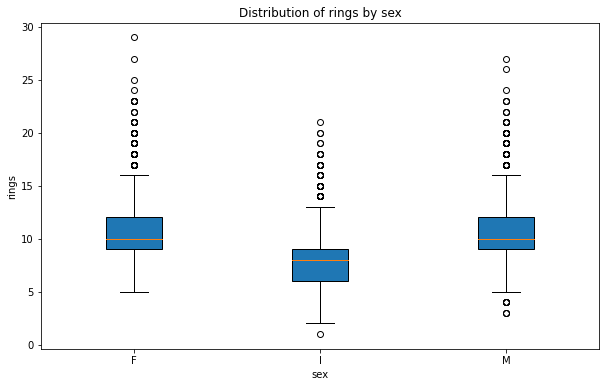

In [41]:
multiboxplot(df, 'rings', 'sex')

While there is plenty overlap, we can observe how the infant 75th percentile ends where the Male/Female 25th percentile starts. From the numbers and the chart, we can also notice that females are slightly older than males in this dataset, with mean rings of 11.1 and 10.7 respectively. We do notice more high outliers for females and no low outliers which may cause this. Unfortunately, out original hypothesis that there is a cutoff for the age of infants is not correct, so we therefore have to treat it as its own sex.

#### Whole Weight and Rings

We will now analyze the relationship between whole weight and rings. It is expected that the more an abalone weighs, the more rings it would have. The more an abalone has been alive, the more fungus, debris, and shell it has accumulated and therefore it would be expected that it has more rings. To analyze this correlation, we will use the pearson and spearman coefficients, along with a scatter plot.

In [42]:
#from Fundamentals, page 226
def correlation(data, x, y):
    print("Correlation coefficients:")
    print( "r =", stats.pearsonr(data[x], data[y])[0]) 
    print( "rho =", stats.spearmanr(data[x], data[y])[0])

In [43]:
correlation(df, 'whole', 'rings')

Correlation coefficients:
r = 0.5403896769239008
rho = 0.6308319554663986


Both of the coefficients present an "interesting" correlation we should look into. Since the spearman is greater, we expect a rank order correlation. We will confirm this with a chart.

In [44]:
#from Fundamentals, page 227
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):
    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10) 
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3) 
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]
    
    figure = plt.figure(figsize=(10, 6)) 
    axes = figure.add_subplot(1, 1, 1)
    xs = data[x]
    
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size) 
    
    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y) 

    if not skip_lowess:
        title += " with LOWESS" 
    axes.set_title(title) 
    axes.set_xlabel(x) 
    axes.set_ylabel(y)

    plt.show() 
    plt.close()

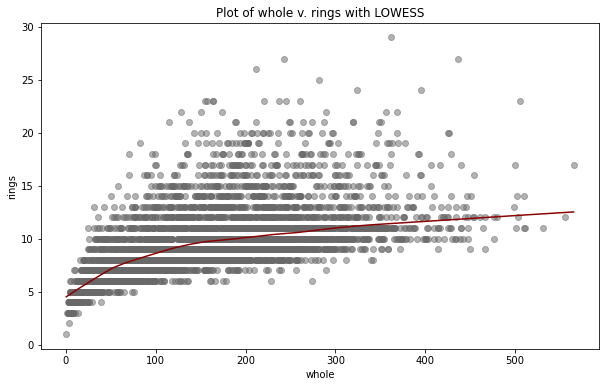

In [45]:
lowess_scatter(df, 'whole', 'rings')

We do see an increasing trend as expected. However, it seems to plateau after a certain weight. We will get a better idea with multiple box plots.

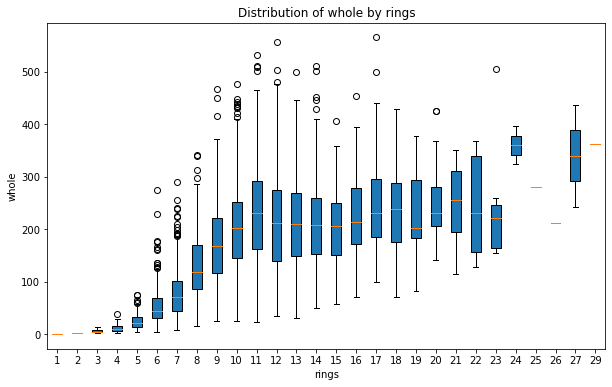

In [46]:
multiboxplot(df, 'whole', 'rings')

The boxplots present a slightly different story. It seems that after about 11 rings, the weight of the abalone reaches a maximum, and any kind of huge weight gain is an anomaly. Additionally, the values above 24 rings are not as reliable, as the data points for those rings are scarce. Thus, we can say that there is a correlation between Whole weight and rings for 1-11 rings, but not so much after that.

#### Length and Rings

Now that we have a better idea between the weight and rings, we can form a more accurate hypothesis about length and rings. We expect the length of the abalone to increase proportionally to the number of rings, until about 11 rings. We then expect it to level out, similar to the weight. We will begin with the coefficients of correlation.

In [47]:
correlation(df, 'length', 'rings')

Correlation coefficients:
r = 0.556719576929618
rho = 0.6043853354046326


Again we see "intersting" relationships above 0.5 between these two variables. This is very similar to the weight variable, in which the Spearman coefficient was slightly larger than the Pearson coefficient. We will use a scatter plot next to visualize these trends.

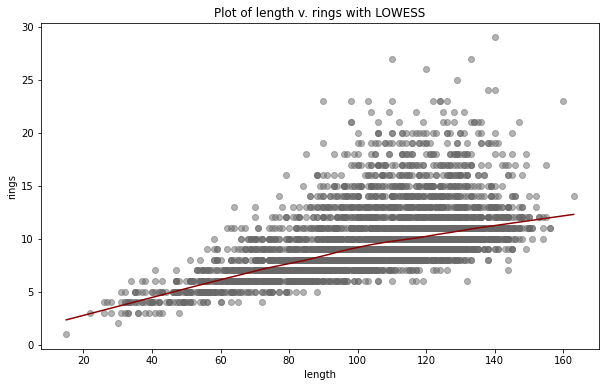

In [48]:
lowess_scatter(df, 'length', 'rings')

We observe a more linear Lowess line. This may indicate a more prolonged increase in the correlation above 11 rings. To confirm, we will use a multibox plot. 

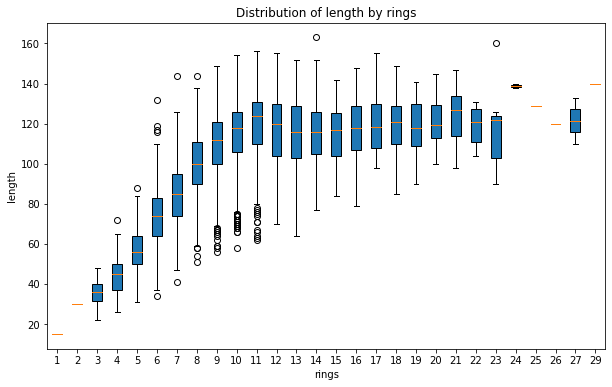

In [49]:
multiboxplot(df, 'length', 'rings')

Surprisingly, the same pattern is observed, as was with height. After about 11 rings, the increase in rings is not well correlated with length, as the length fails to increase as more rings are added. The Lowess disagreed with this however, which may have been attributed to the sparse data that contained a higher number of rings. 

#### Diameter

Since diameter may be correlated with length, we expect to see the same pattern. We will again start with the coefficients.

In [50]:
correlation(df, 'diameter', 'rings')

Correlation coefficients:
r = 0.5746598513059192
rho = 0.6228950050921535


We notice a 0.02 increase in both correlation coefficients compared to the length, which is not astronomical, but we can say that the diameter is slightly more correlated with the number of rings. It is still not big enough to be considered very significant, but it is still interesting. We will use a scatter plot to see this correlation visually.

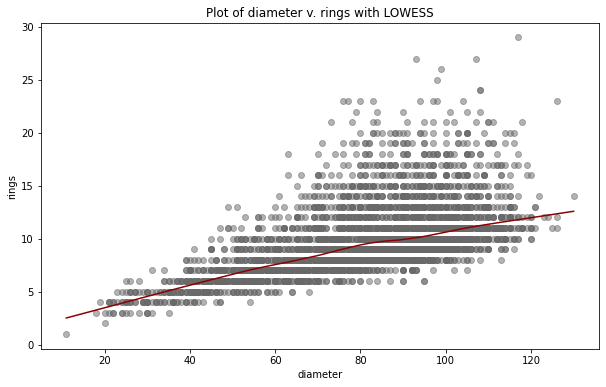

In [51]:
lowess_scatter(df, 'diameter', 'rings')

Again, we see a more linear Lowess line and more variable data as the diameter increases. Since the increased variability begins ar around 11 rings, we can again assume the multibox plot will look the same, but let us check.

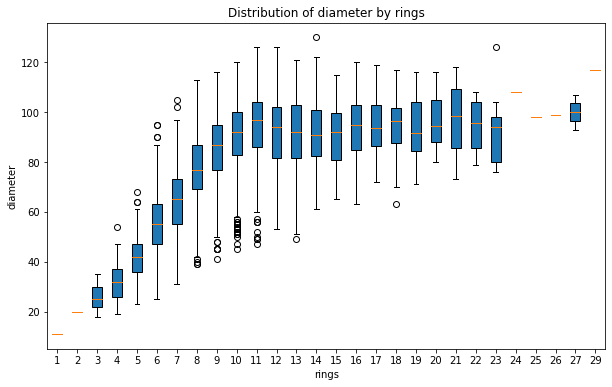

In [52]:
multiboxplot(df, 'diameter', 'rings')

Confirmed, and not only does it level out, but it seems like the quartile markers get narrower the more rings we have. But again, this is probably due to the lack of data and not necessarily decreased variability, which is supported by the scatter plot. 

#### Height

Finally, we have our last variable, height. Height is expected to follow the same pattern as the other dimensions. However, we must remember to use our cleaned up data for height instead of the original in order to get proper results.

In [53]:
correlation(dffix, 'height', 'rings')

Correlation coefficients:
r = 0.6101065785871613
rho = 0.6581393185221938


We notice that using the fixed dataset, height has the biggest correlation out of all the variables tested. If we were to do any kind of modeling, this would be a good variable to use. We also observe a higher Spearman coefficient then Pearson, which indicates still a rank order relationship. We will plot the points expecting them to look similar to diameter and length

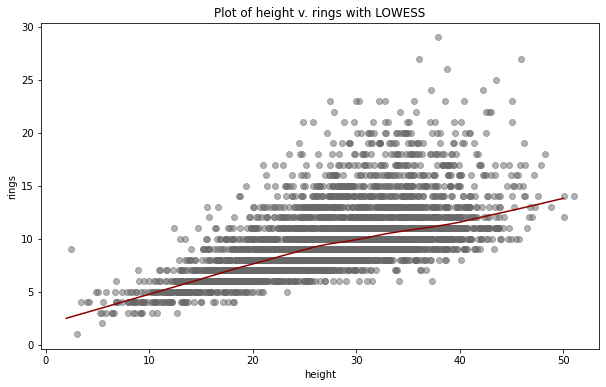

In [54]:
lowess_scatter(dffix, 'height', 'rings', jitter=0.01)

As expected, the scatter plot and Lowess line look almost identical to the other two dimensions of Abalone. We again see the classic cone shape, and expect to see a plateau after 11 rings in the box plot.

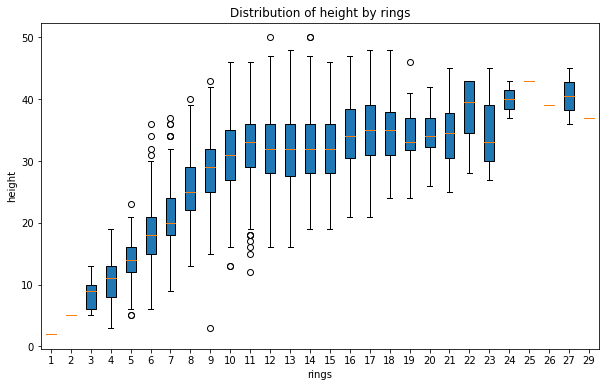

In [55]:
multiboxplot(dffix, 'height', 'rings')

While this looks similar to the other dimensions, it has the highest correlation coefficients, although neither are spectacular. We again notice the characteristic plateau after 11 rings, with a very slight increase towards the end that is probabily attributable to sparse data. 

We originally made the assumption that the weight would have been too similar to test each one against the rings, but it turns out so are the dimensions. Thus, moving forward we will designate "whole weight" as a general variable for the entire weight category and "height" for the entire dimension category. 

## 1.4 Statistical and Mathematical Modeling

We will now attempt to create some models to be able to predict how many rings an Abalone will have based on different conditions. We will begin with how the sex of the Abalone affects its rings. We already know that there is some kind of correlation, but we want to be able to predict, for a new Abalone, the likely amount of rings based on its sex:

P ( rings | sex )

To do this we will calculate the conditional probabily for each sex in a crosstabulation and heatmap. We expect a lower number of rings for Infants than Male/Female, and we expect the male and female to be fairly equal.

rings        1         2         3         4         5         6         7   \
sex                                                                           
F      0.000000  0.000000  0.000000  0.000000  0.003060  0.012242  0.033665   
I      0.000745  0.000745  0.008942  0.038003  0.074516  0.160954  0.198957   
M      0.000000  0.000000  0.001963  0.003927  0.007199  0.017670  0.052356   

rings        8         9         10  ...        19        20        21  \
sex                                  ...                                 
F      0.093344  0.182096  0.189748  ...  0.011477  0.009181  0.005356   
I      0.204173  0.128912  0.068554  ...  0.001490  0.001490  0.000745   
M      0.112565  0.181937  0.192408  ...  0.009817  0.007853  0.003927   

rings        22        23        24        25        26        27        29  
sex                                                                          
F      0.002295  0.004591  0.000765  0.000765  0.000000  0.000765  0.000765  

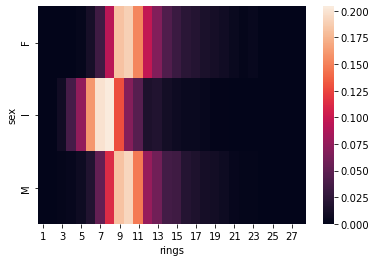

In [61]:
#from Fundamentals, page 301
frequencies = pd.crosstab(df["sex"], df["rings"]).apply(lambda r: r/r.sum(), axis=1)
print(frequencies)

sns.heatmap(frequencies)

The crosstabulations provide us with raw numbers, which in this case can be overwhelming, but the heatmap does an exceedingly good job at clarifying the story. We can observe that if the next Abalone picked is an infant, it is mort likely to have 8 rings than any other ring count. In contrast, a male OR female is more likely to have 10 rings. More precisely, using the crosstabs we can observe:

A 20.4% chance that the next infant abalone picked will have 8 rings, 19.9% that it will have 7 rings, and 16.1% that it will have 6 rings. 

In contrast, the next male abalone picked is 19.2% likely to have 10 rings, 18.2% to have 9 rings, and 11.2% to have 8 rings. 

Similarly, the next female abalone picked is 19.0% likely to have 10 rings, 18.2% likely to have 9 rings, and 9% likely to have 8 rings.

Next, we will create a model based on the number of rings. This model will tells us what the probability is that the next abalone found will have rings within a certain range. Because we are dealing with somewhat continous values, we will use densities.

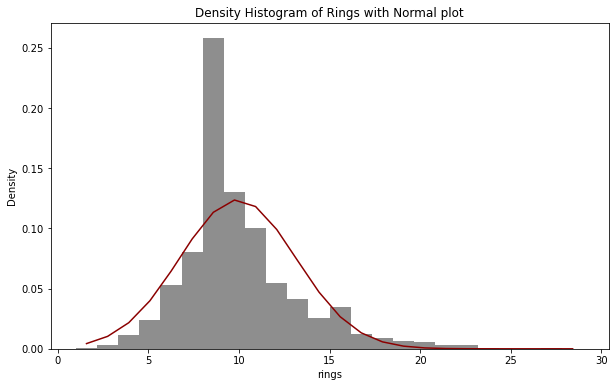

In [62]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(df[ "rings"], color="DimGray", density=True, bins=24, alpha=0.75)
axes.set_xlabel( "rings")
axes.set_ylabel( "Density")
axes.set_title("Density Histogram of Rings with Normal plot")


xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]

mean = np.mean(df["rings"])
std = np.std(df["rings"])
ys = [norm.pdf( k, loc=mean, scale=std) for k in xs] 
axes.plot(xs, ys, color="darkred")

plt.show() 
plt.close()

With our model created, we can run different functions that will tell us the probability of finding an abalone that meets the description. For instance, the probability of finding an abalone with at most 5 rings is:

In [63]:
stats.norm.cdf(5,mean,std)

0.06295861135110943

Thus we can use our model to predict that the probability of the next abalone having 5 rings or less is 6.3%.

The probability of finding an abalone that has between 10 and 15 rings is:

In [64]:
(stats.norm.cdf(15,mean,std)) - (stats.norm.cdf(10,mean,std))

0.43376582743369674

Using these two models, we can find out the probability of the number of rings the next abalone will have, and thus, its age. 